# MBA em Ciência de Dados
## Técnicas Avançadas de Captura e Tratamento de Dados


### <span style="color:darkred">Dados não estruturados: sinais e imagens</span>

### <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

---

#### <span style="color:red">As respostas devem ser dadas no Moodle, o notebook deve ser usado para executar código para obtenção dos resultados.</span>

---

In [1]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Questão 1)

Escolha a alternativa que descreva dados não estruturados do tipo sequencial:

(a) os valores diários relativos ao montante (em reais) de vendas de um café durante o mês de abril de 2022<br>
(b) os valores de precipitação (em milímetros) coletados num mesmo momento em todas as capitais brasileiras<br>
(c) uma lista ordenada, do menor para o maior, contendo os preços de produtos após realizada uma busca por um cliente numa plataforma de e-commerce<br>
(d) uma base de dados de fotos para reconhecimento facial de funcionários de uma empresa<br>

### Questão 2)

Escolha a alternativa que descreva dados não estruturados do tipo espacial:

(a) áudio capturado em uma região de preservação ambiental para detectar espécies que circulam por aquele local<br>
(b) índice BOVESPA coletado ao longo de 5 anos<br>
(c) dados que compõem o endereço completo de um cliente de uma empresa<br>
(d) pixels de uma imagem obtida da folha de uma planta em um cultivo agrícola<br>


### Questão 3)
 
Considere as seguintes afirmações sobre o método Bag-of-features:

I - quanto menor o tamanho do dicionário, melhor será a representação resultante por ser mais compacta<br>
II - é equivalente ao método PCA para o caso de extração de características em dados não estruturados<br>
III - é exclusivo para bases de dados de sinais e imagens<br>
IV - pode-se utilizar qualquer extrator de características como base para sua aplicação<br>
V - sua maior vantagem é possibilidade de fazer escolhas nas suas diferentes etapas, e sua maior desvantagem é a necessidade de escolher bem cada uma dessas etapas, o que pode consumir tempo e recursos computacionais.<br>


São verdadeiras as afirmações:

(a) I e II<br>
(b) II e IV<br>
(c) III e V<br>
(d) IV e V<br>

### Questão 4)

Carregue os dados do arquivo `pollution_ds.csv` utilizando o comando `pd.read_csv()`

Esse dataframe possui 4 colunas (X, Y, Z, W) relativas à medição de dióxido de sulfuro em 4 localizações. Foram feitas medições durante 2 dias a cada 5 minutos em diferentes posições de uma cidade, sendo que o primeiro deles (X) é sabido ter sido capturado em um bairro residencial.

Queremos identificar qual das localizações desconhecidas (Y, Z, W) mais se assemelha a primeira (X). Para isso, extraia um vetor de características (para cada sinal) composto de 3 valores:
* Entropia da energia (com 12 blocos)
* Entropia espectral (com 12 blocos)
* Dispersão espectral (considere frequência = 0.2Hz)

Compute a distância Euclidiana entre o vetor de características de X o os outros e identifique aquele que possui a menor distância para X. Considerando o vetor mais próximo (Y, Z ou W), verifique qual característica (individualmente) apresentou a MENOR diferença em relação à esta característica no vetor do sinal X.

(a) Mais próxima: Z; característica mais próxima: Entropia espectral<br>
(b) Mais próxima: Y; característica mais próxima: Dispersão espectral<br>
(c) Mais próxima: W; característica mais próxima: Dispersão espectral<br>
(d) Mais próxima: Y; característica mais próxima: Entropia da energia<br>

In [55]:
data = pd.read_csv('./dados/pollution_ds.csv',)
data.head(3)

,X,Y,Z,W
0,67,100,76,79
1,67,103,74,84
2,68,104,73,84


### Questão 5)

Carrege as imagens da base de dados `lfw_subset` contida na biblioteca `skimage`, conforme código abaixo. Considere apenas as 100 primeiras imagens dessa base de dados (referente a faces).

Vamos utilizar o método LBP (com implementação conforme visto nos exercícios e replicada abaixo) e a distância L1 para comparar faces dessa base de dados.

Utilizando como imagem de consulta a imagem de índice 5 (sexta imagem) da lista, e os seguintes parâmetros para o LBP:
* points = 12
* radius = 1.45
* n_bins = 64

Retorne as 5 imagens mais similares (excluindo a de consulta). Quais são os índices dessas imagens?

(a) 56,  2,  8, 85, 55<br>
(a) 44, 49, 47, 56, 37<br>
(b) 56,  0,  8, 85, 37<br>
(c) 44,  0, 47, 56, 55<br>

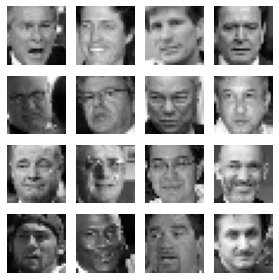

In [66]:
import matplotlib.pyplot as plt
import matplotlib
from skimage import feature
from skimage import data
fig, axes = plt.subplots(4, 4, figsize=(4, 4))
ax = axes.ravel()
imgs = data.lfw_subset()
for i in range(16):
    ax[i].imshow(imgs[i], cmap=plt.cm.gray)
    ax[i].axis('off')
fig.tight_layout()